# Food Prediction Project

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Import price data

df = pd.read_csv("maize.csv")
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,11,2010,179.0000,MINAGRI
1,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,12,2010,189.6667,MINAGRI
2,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,1,2011,185.2500,MINAGRI
3,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,2,2011,187.0000,MINAGRI
4,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,3,2011,186.2000,MINAGRI


### Data Description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   adm0_id             4024 non-null   int64  
 1   adm0_name           4024 non-null   object 
 2   adm1_id             4024 non-null   int64  
 3   adm1_name           4024 non-null   object 
 4   mkt_id              4024 non-null   int64  
 5   mkt_name            4024 non-null   object 
 6   cm_id               4024 non-null   int64  
 7   cm_name             4024 non-null   object 
 8   cur_id              4024 non-null   int64  
 9   cur_name            4024 non-null   object 
 10  pt_id               4024 non-null   int64  
 11  pt_name             4024 non-null   object 
 12  um_id               4024 non-null   int64  
 13  um_name             4024 non-null   object 
 14  mp_month            4024 non-null   int64  
 15  mp_year             4024 non-null   int64  
 16  mp_pri

- From the information above, we know we have 4024 entries, 9 int columns,8 columns are object data type, one float. 
- Also No missing data or empty space

In [5]:
df.describe()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_year,mp_price
count,4024.0,4024.000000,4024.000000,4024.0,4024.0,4024.0,4024.0,4024.000000,4024.000000,4024.000000
mean,205.0,20439.419235,1135.664016,51.0,77.0,15.0,5.0,6.505716,2011.997515,231.762502
std,0.0,5230.123152,139.856951,0.0,0.0,0.0,0.0,3.434696,2.218825,63.155816
min,205.0,2587.000000,1045.000000,51.0,77.0,15.0,5.0,1.000000,2008.000000,50.000000
25%,205.0,21969.000000,1062.000000,51.0,77.0,15.0,5.0,4.000000,2010.000000,196.276775
50%,205.0,21971.000000,1085.000000,51.0,77.0,15.0,5.0,7.000000,2012.000000,231.250000
75%,205.0,21972.000000,1105.000000,51.0,77.0,15.0,5.0,9.000000,2014.000000,267.041675
max,205.0,21973.000000,1562.000000,51.0,77.0,15.0,5.0,12.000000,2015.000000,1400.000000


In [49]:
df.describe(include=['object'])

,adm0_name,adm1_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_commoditysource
count,4024,4024,4024,4024,4024,4024,4024,4024
unique,1,5,62,1,1,1,1,1
top,Rwanda,$West/Iburengerazuba,Rwagitima,Maize,RWF,Retail,KG,MINAGRI
freq,4024,969,96,4024,4024,4024,4024,4024


### Cleaning Data set

In [6]:
#dropping all the ids because they're irrelevant to mp_price during analysis
df.drop(columns=["adm0_id","adm1_id","mkt_id","cm_id","cur_id","pt_id","um_id"],axis=1, inplace=True)  
df.head()

,adm0_name,adm1_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,Rwanda,$West/Iburengerazuba,Birambo,Maize,RWF,Retail,KG,11,2010,179.0000,MINAGRI
1,Rwanda,$West/Iburengerazuba,Birambo,Maize,RWF,Retail,KG,12,2010,189.6667,MINAGRI
2,Rwanda,$West/Iburengerazuba,Birambo,Maize,RWF,Retail,KG,1,2011,185.2500,MINAGRI
3,Rwanda,$West/Iburengerazuba,Birambo,Maize,RWF,Retail,KG,2,2011,187.0000,MINAGRI
4,Rwanda,$West/Iburengerazuba,Birambo,Maize,RWF,Retail,KG,3,2011,186.2000,MINAGRI


In [53]:
#Getting the classification groups

print(df.adm1_name.unique())
print("\n", df.mkt_name.unique())

['$West/Iburengerazuba' '$North/Amajyaruguru' '$South/Amajyepfo'
 'Kigali City/Umujyi wa Kigali' '$East/Iburasirazuba']

 ['Birambo' 'Base' 'Bugarama' 'Bushenge' 'Butare' 'Byangabo' 'Byumba'
 'Congo - Nil' 'Gahanga' 'Gakenke' 'Gasarenda' 'Gaseke' 'Gashyushya'
 'Gatore' 'Gikongoro' 'Gisenyi' 'Kabacuzi' 'Kabarondo' 'Kabaya' 'Kamembe'
 'Kayenzi' 'Kibirizi' 'Kibungo' 'Kicukiro' 'Kimisagara' 'Kirambo' 'Mahoko'
 'Mukamira' 'Mukarange' 'Mulindi' 'Musanze' 'Musha' 'Ndago' 'Nyabugogo'
 'Nyagahanika' 'Nyagatare' 'Nyakarambi' 'Nyamata' 'Nyamirambo' 'Nyanza'
 'Rugarama' 'Ruhuha' 'Rukomo' 'Rushashi' 'Rwagitima' 'Rwamagana' 'Buhanda'
 'Karenge' 'Kimironko' 'Mugina' 'Muhanga' 'Ngororero' 'Ruhango' 'Karambi'
 'Kizi' 'Kibuye' 'Nkora' 'Muhondo' 'Ntunga' 'Gacurabwenge' 'Matimba'
 'Rusine']


- adm1_name has 5 classification groups
- mkt_name has 62 classification groups or markets

In [112]:
# Changing adm1_name to 'Region', Region seems to describe the column set just fine

df.rename(columns = {'adm1_name': 'Region'}, inplace=True)

In [21]:
# Shortening the classification group names

df['Region'].replace({'$West/Iburengerazuba': 'West', '$North/Amajyaruguru': 'North',
                      '$South/Amajyepfo': 'South', 'Kigali City/Umujyi wa Kigali': 'Kigali City', 
                      '$East/Iburasirazuba': 'East'}, inplace=True)

### Plotting the price of maize

In [113]:
fx = df[['Region','mkt_name','mp_month','mp_year','mp_price']].groupby('mp_year').mean()

In [114]:
fx1 = fx.reset_index()
fx1

,mp_year,mp_month,mp_price
0,2008,6.302452,193.307448
1,2009,6.507289,233.334208
2,2010,6.840796,177.951047
3,2011,6.522484,221.676651
4,2012,6.548845,255.011819
5,2013,6.568289,261.437672
6,2014,6.361564,245.385530
7,2015,6.435816,231.063958


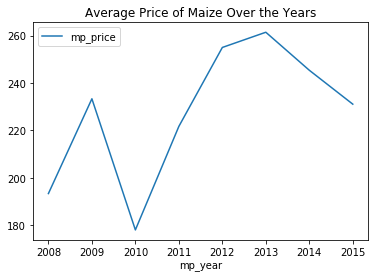

In [105]:
fx1.plot(kind='line', x='mp_year', y='mp_price', title='Average Price of Maize Over the Years')
plt.show()   

In [49]:
rg_data = df[['Region','mp_year','mp_price']]
rg_data

,Region,mp_year,mp_price
0,West,2010,179.0000
1,West,2010,189.6667
2,West,2011,185.2500
3,West,2011,187.0000
4,West,2011,186.2000
...,...,...,...
4019,North,2014,200.0000
4020,North,2015,300.0000
4021,North,2015,250.0000
4022,North,2015,300.0000


In [117]:
# Isolating data for the 5 Regions

westR = rg_data[rg_data.Region == 'West']
northR = rg_data[rg_data.Region == 'North']
southR = rg_data[rg_data.Region == 'South']
eastR = rg_data[rg_data.Region == 'East']
kigali = rg_data[rg_data.Region == 'Kigali City']

print(westR.head())
print("\n", northR.head())
print("\n", southR.head())
print("\n", eastR.head())
print("\n", kigali.head())

  Region  mp_year  mp_price
0   West     2010  179.0000
1   West     2010  189.6667
2   West     2011  185.2500
3   West     2011  187.0000
4   West     2011  186.2000

    Region  mp_year  mp_price
62  North     2008     160.0
63  North     2008     140.0
64  North     2008     140.0
65  North     2008     140.0
66  North     2008     132.5

     Region  mp_year  mp_price
339  South     2008     225.0
340  South     2008     272.5
341  South     2008     187.5
342  South     2008     200.0
343  South     2008     200.0

     Region  mp_year  mp_price
957   East     2012  350.0000
958   East     2012  216.6667
959   East     2012  232.5000
960   East     2012  242.5000
961   East     2012  200.0000

           Region  mp_year  mp_price
675  Kigali City     2010  107.5000
676  Kigali City     2010  121.6667
677  Kigali City     2010  108.7500
678  Kigali City     2010  177.5000
679  Kigali City     2010  181.2500


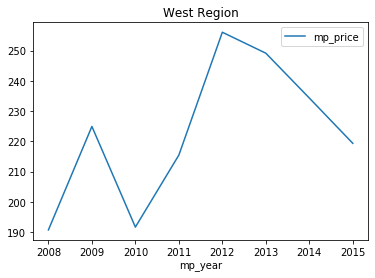

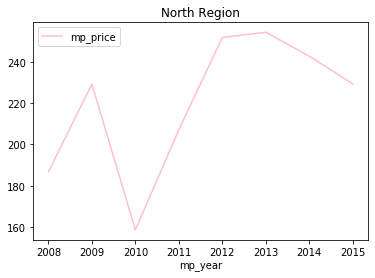

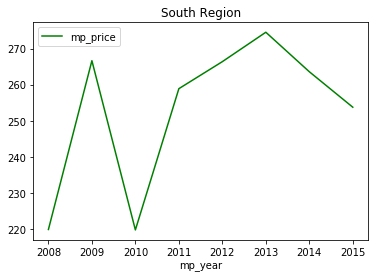

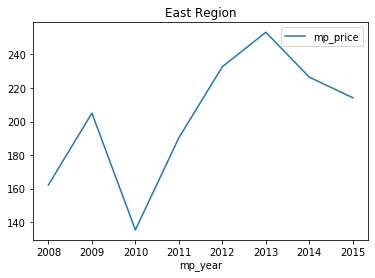

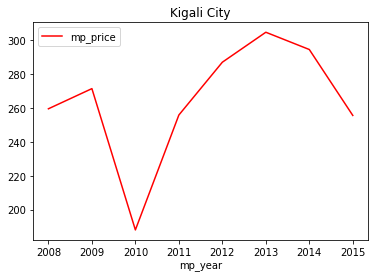

In [108]:
# Plotting price for West Region

west = westR.groupby(['mp_year']).mean().reset_index()
north = northR.groupby(['mp_year']).mean().reset_index()
south = southR.groupby(['mp_year']).mean().reset_index()
east = eastR.groupby(['mp_year']).mean().reset_index()
kigal = kigali.groupby(['mp_year']).mean().reset_index()

west.plot(kind='line', x='mp_year', y='mp_price', title='West Region')
north.plot(kind='line', x='mp_year', y='mp_price', color='pink', title='North Region')
south.plot(kind='line', x='mp_year', y='mp_price', color='green', title='South Region')
east.plot(kind='line', x='mp_year', y='mp_price', title='East Region')
kigal.plot(kind='line', x='mp_year', y='mp_price', color='red', title='Kigali City')


plt.show()

### Train data